In [1]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Generic imports
import matplotlib.pyplot as plt
plt.rc('image', origin='lower', cmap='Blues_r')

import numpy as np
import glob, os

from astropy.wcs import WCS
from astropy.io import fits as fits

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time

import astroscrappy

# Disable some annoying warnings from astropy
import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter(action='ignore', category=FITSFixedWarning)
from astropy.utils.exceptions import AstropyUserWarning
warnings.simplefilter(action='ignore', category=AstropyUserWarning)

%cd '~/stdpipe/notebooks/'

/Users/karpov/sciwork/stdpipe/notebooks


In [2]:
# Load our sub-modules
from stdpipe import astrometry, photometry, catalogs, cutouts, templates, subtraction, plots, psf, pipeline, utils

# Stacking of images

You may want to coadd or mosaic some images before processing them. While there are dedicated large-scape packages like [Montage](http://montage.ipac.caltech.edu) that handle it *properly*, it still may be done manually with relatively little efforts using e.g. Python [reproject](https://github.com/astropy/reproject) package.

Below is a simple example of how to do it.

We will use some data from INTEGRAL GRB 220514A acquired by GRANDMA. The images are already pre-processed, i.e. dark-subtracted and flat-fielded, and already have proper WCS solutions in their headers.


For actual work here, we will use reproject package, which is nicely documented at  https://reproject.readthedocs.io/

Its installation is as simple as `pip install reproject`

In [3]:
import reproject

Declare some variables and define the images to work on

In [4]:
# GRB 220514A
target = SkyCoord(147.66556, 13.15628, unit='deg')
target

<SkyCoord (ICRS): (ra, dec) in deg
    (147.66556, 13.15628)>

In [5]:
# Some data from GRANDMA ownCloud
filenames = glob.glob('/Users/karpov/GRANDMA-ownCloud/Candidates/GRB/GRB220514A_INTEGRAL/IMAGES/UNSTACK/GRB220514A_Guo_Xinglong-TNT_*_UNSTACK.fits')

print('Will coadd', len(filenames), 'images')

Will coadd 3 images


Processing /Users/karpov/GRANDMA-ownCloud/Candidates/GRB/GRB220514A_INTEGRAL/IMAGES/UNSTACK/GRB220514A_Guo_Xinglong-TNT_2022-05-14T13-58-35_R_UNSTACK.fits : center 147.704 13.170 radius 0.13 deg, pixscale 0.52 ''/pix
99 objects found in the image
221 catalogue stars loaded
Astrometric refinement using 2.6 arcsec radius, photometric matching and scamp WCS fitting
Using user-provided local catalogue
Will run SCAMP like that:
/Users/karpov/opt/miniconda3/envs/stdpipe/bin/scamp /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphiuk6d7u/objects.cat -c /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphiuk6d7u/empty.conf -VERBOSE_TYPE QUIET -SOLVE_PHOTOM N -CHECKPLOT_TYPE NONE -WRITE_XML Y -XML_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphiuk6d7u/scamp.xml -PROJECTION_TYPE TPV -CROSSID_RADIUS 2.5807686142222352 -DISTORT_DEGREES 1 -HEADER_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphiuk6d7u/objects.head -ASTREF_CATALOG FILE -ASTREFCAT_NAME /var/folders/82

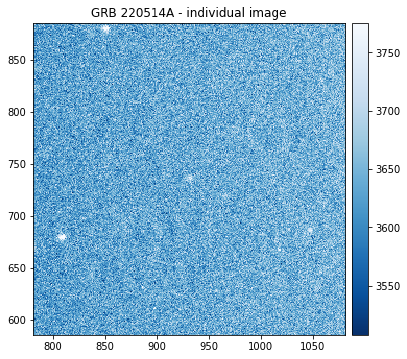

Processing /Users/karpov/GRANDMA-ownCloud/Candidates/GRB/GRB220514A_INTEGRAL/IMAGES/UNSTACK/GRB220514A_Guo_Xinglong-TNT_2022-05-14T14-03-53_R_UNSTACK.fits : center 147.704 13.170 radius 0.13 deg, pixscale 0.52 ''/pix
93 objects found in the image
Astrometric refinement using 2.6 arcsec radius, photometric matching and scamp WCS fitting
Using user-provided local catalogue
Will run SCAMP like that:
/Users/karpov/opt/miniconda3/envs/stdpipe/bin/scamp /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphe7nv30l/objects.cat -c /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphe7nv30l/empty.conf -VERBOSE_TYPE QUIET -SOLVE_PHOTOM N -CHECKPLOT_TYPE NONE -WRITE_XML Y -XML_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphe7nv30l/scamp.xml -PROJECTION_TYPE TPV -CROSSID_RADIUS 2.5811105017065925 -DISTORT_DEGREES 1 -HEADER_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scamphe7nv30l/objects.head -ASTREF_CATALOG FILE -ASTREFCAT_NAME /var/folders/82/92l2np5529qbpckrl8ttlj2000

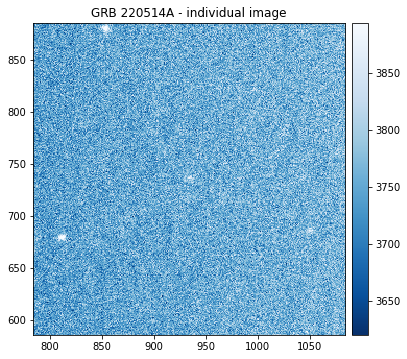

Processing /Users/karpov/GRANDMA-ownCloud/Candidates/GRB/GRB220514A_INTEGRAL/IMAGES/UNSTACK/GRB220514A_Guo_Xinglong-TNT_2022-05-14T14-09-11_R_UNSTACK.fits : center 147.705 13.170 radius 0.13 deg, pixscale 0.52 ''/pix
91 objects found in the image
Astrometric refinement using 2.6 arcsec radius, photometric matching and scamp WCS fitting
Using user-provided local catalogue
Will run SCAMP like that:
/Users/karpov/opt/miniconda3/envs/stdpipe/bin/scamp /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scampvjq50nkm/objects.cat -c /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scampvjq50nkm/empty.conf -VERBOSE_TYPE QUIET -SOLVE_PHOTOM N -CHECKPLOT_TYPE NONE -WRITE_XML Y -XML_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scampvjq50nkm/scamp.xml -PROJECTION_TYPE TPV -CROSSID_RADIUS 2.581064946946668 -DISTORT_DEGREES 1 -HEADER_NAME /var/folders/82/92l2np5529qbpckrl8ttlj200000gn/T/scampvjq50nkm/objects.head -ASTREF_CATALOG FILE -ASTREFCAT_NAME /var/folders/82/92l2np5529qbpckrl8ttlj20000

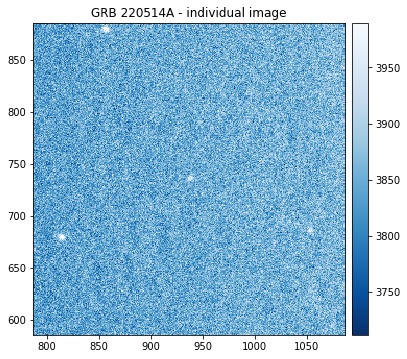

In [6]:
wcs0 = None # Here we will hold the WCS solution for the resulting stack
header0 = None # Corresponding FITS header
cat0 = None # Catalogue of stars around the sky region

images = [] # Will hold re-projected images, all having the same WCS

# Cycle through the images!
for filename in filenames:
    # Read the image and its header
    image = fits.getdata(filename).astype(np.double) # Convert to floating point for easier work later
    header = fits.getheader(filename)
    
    # Initial WCS solution
    wcs = WCS(header)
    
    ra0,dec0,sr0 = astrometry.get_frame_center(header=header)
    pixscale = astrometry.get_pixscale(wcs=wcs)
    
    print('Processing', filename, ': center %.3f %.3f radius %.2f deg, pixscale %.2f \'\'/pix' % (ra0, dec0, sr0, pixscale*3600))
    
    if True:
        # In our example, we have nice WCS solution already. However, here for the sake of completeness 
        # we will show how to refine the astrometry in case it is not exactly reliable
        
        # So first we detect the objects in the image using some first guess parameters
        mask = np.isnan(image) | (image > 50000)
        obj = photometry.get_objects_sextractor(image, mask=mask, r0=0.0, aper=3)
        
        print(len(obj), 'objects found in the image')
        
        # Load the catalogue for this region if not yet loaded
        if cat0 is None:
            # We will use ATLAS-RefCat2 catalogue which is quite deep and all-sky
            cat0 = catalogs.get_cat_vizier(ra0, dec0, 1.5*sr0, 'atlas', filters={'gmag':'<21'})
            print(len(cat0), 'catalogue stars loaded')
            
        # Refine astrometric solution using detected objects and catalogue
        wcs = pipeline.refine_astrometry(obj, cat0, 5*pixscale, wcs=wcs, order=1, method='scamp', verbose=True)
        if wcs is None:
            print('Failed to refine astrometric solution!')
            break
            
    if True:
        # Here we will show a small cutout around transient position
        
        # Pixel coordinates of the transient
        x,y = wcs.all_world2pix(target.ra.deg, target.dec.deg, 0)

        plt.figure(figsize=(6, 6))
        plots.imshow(image, [0.5, 99.7], interpolation='nearest')

        plt.xlim(x - 150, x + 150)
        plt.ylim(y - 150, y + 150)

        plt.title('GRB 220514A - individual image')
        plt.show()

    # We will use first frame WCS as a reference astrometry for the resulting stack in this example
    if wcs0 is None:
        wcs0 = wcs
        header0 = header # Also keep the first header
        
        # First image should not be re-projected, we will keep it as-is
        images.append(image)
    else:
        # All other images should be re-projected to first one pixel grid
        image1,fp = reproject.reproject_adaptive((image, wcs), wcs0, images[0].shape)
        image1[fp<0.5] = np.nan # Mask parts of the image not completely covered
        
        images.append(image1)


Let's stack the image!

We will use simplest method - just co-adding everything. This way we are keeping the gain value the same as it was on original images, but extending the dynamic range / saturation level.

Regions masked (set to NaN) on any individual image will be masked in the stack as well.

In [7]:
coadd = np.sum(images, axis=0)

And now, for comparison, the same cutout from stacked image.

We stacked only three images so improvement is not striking - but it is still obvious!

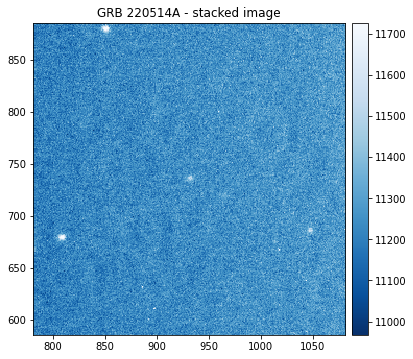

In [8]:
# Pixel coordinates of the transient
x,y = wcs0.all_world2pix(target.ra.deg, target.dec.deg, 0)

plt.figure(figsize=(6, 6))
plots.imshow(coadd, [0.5, 99.7], interpolation='nearest')

plt.xlim(x - 150, x + 150)
plt.ylim(y - 150, y + 150)

plt.title('GRB 220514A - stacked image')
plt.show()

Let's now check the complete coadd and compare it to first image

Text(0.5, 1.0, 'First image')

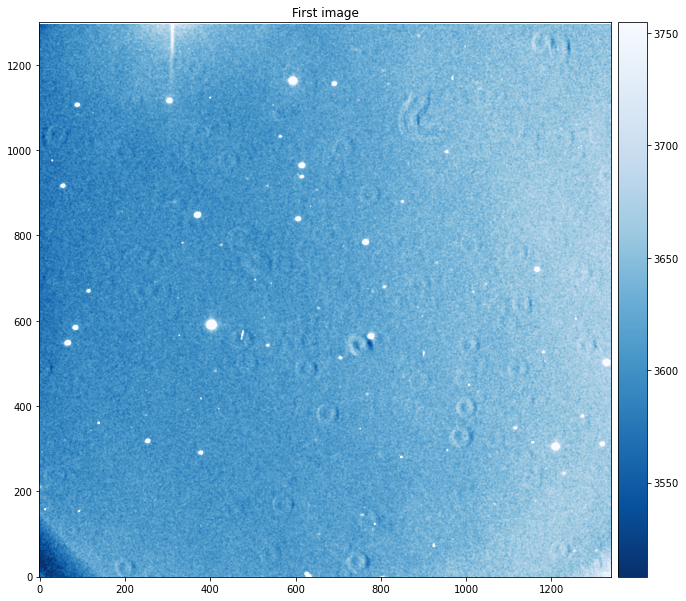

In [9]:
plots.imshow(images[0])
plt.title('First image')

Text(0.5, 1.0, 'Stacked image')

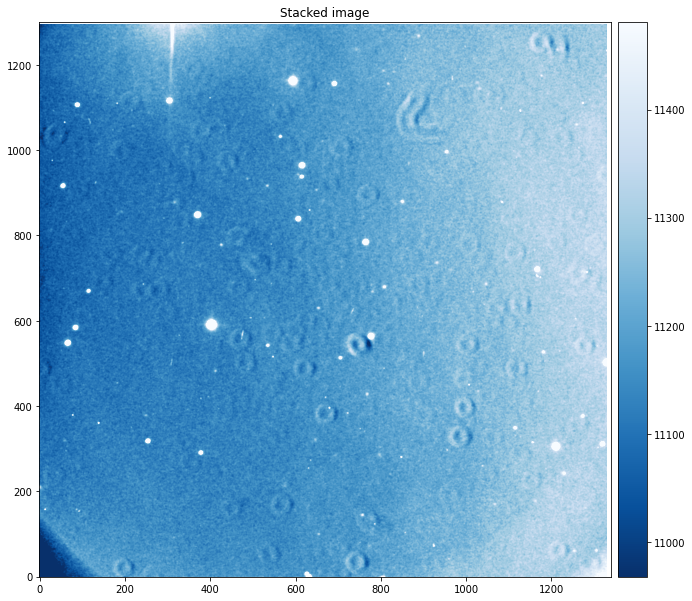

In [10]:
plots.imshow(coadd)
plt.title('Stacked image')

We may now store the stack somewhere

In [11]:
# Keep number of stacked images in the header
header0['STACKED'] = len(images) 

fits.writeto('/tmp/GRB220514A_Guo_Xinglong-TNT_2022-05-14T13-58-35_R_STACK.fits', coadd, header0, overwrite=True)